             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Text(0, 0.5, 'PRICE')

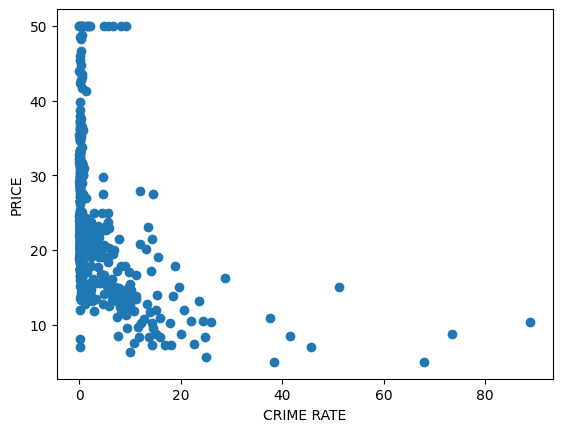

In [24]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Since I have downloaded the boston database from kaggle  i will directly read the dataset

boston=pd.read_csv("/content/drive/MyDrive/Data/boston.csv")

# type(boston)  # here since i have download the dataset using  so it is showing me pandas.core.frame.DataFrame
# print(df.DESCR)    #  i can only do like this when i have taken the dataset from the skelearn lib .

# print(boston.columns) # To show the information about the I have downloaded the dataset externally using kaggle

dataset=pd.DataFrame(boston)  # create a the dataframe from the boston dataset (converted the csv file into dataframe)

# dataset["PRICE"]=dataset["MEDV"]*1000   # here  i dont need to make the price columns since it was already given to me so that why i did rename of the columns
# dataset

dataset=dataset.rename(columns={"MEDV":"PRICE"})
dataset

# dataset.info()

# dataset.describe() # Summarizing the Stats of the data

# dataset.isnull() .sum() # this step is super important that is there any missing data in the dataset or any specific columns



# Now Come The Exploratory Data Analysis EDA:-


print(dataset.corr()) # it will show the correlation of the dataset  this steps will very important

# sns.pairplot(dataset)  # it will plot the pairplot on the entire dataset

plt.scatter(dataset['CRIM'],dataset["PRICE"])  # here since the CRIM and PRICE are inversely correlated so that why you are getting the scatterplot like that way
plt.xlabel("CRIME RATE")
plt.ylabel("PRICE")




Text(0, 0.5, 'PRICE')

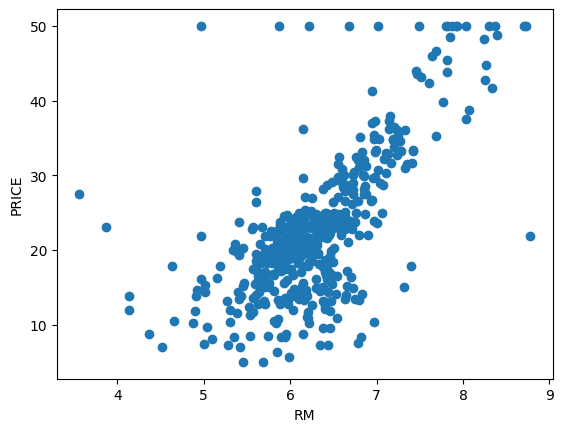

In [25]:
plt.scatter(dataset['RM'],dataset['PRICE'])
plt.xlabel("RM")
plt.ylabel("PRICE")




Observation:- As the Number of the Room increase the price also increases

<Axes: xlabel='RM', ylabel='PRICE'>

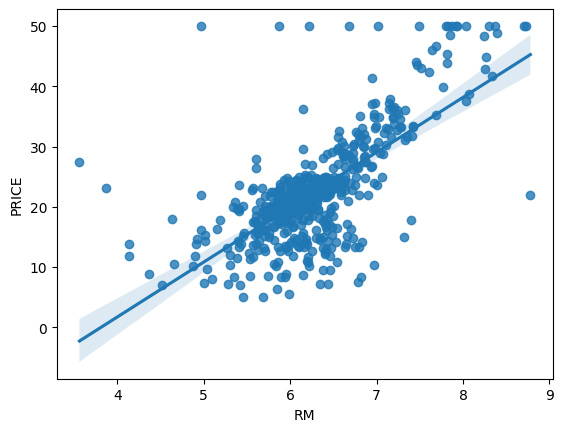

In [26]:
import seaborn as sns
sns.regplot(x='RM',y='PRICE',data=dataset)  # this plot shows the simple regression line between RM(Room number) and Price . And it also inditcate the positive correlation



<Axes: xlabel='LSTAT', ylabel='PRICE'>

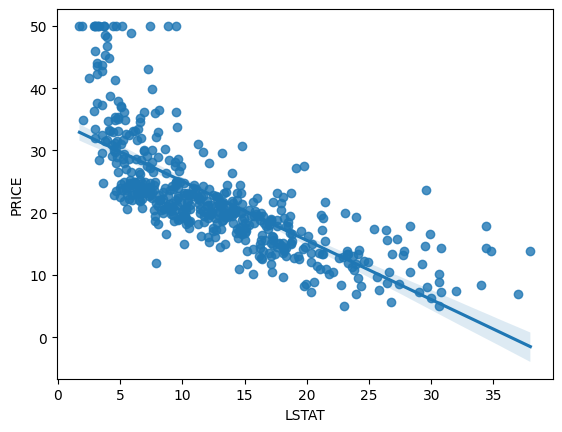

In [27]:
sns.regplot(x="LSTAT",y="PRICE",data=dataset)

<Axes: xlabel='CHAS', ylabel='PRICE'>

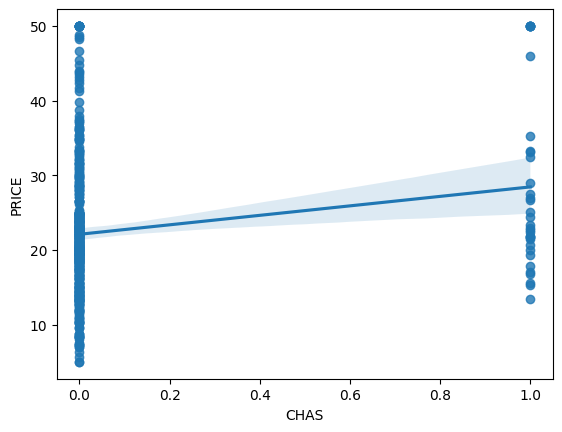

In [28]:
sns.regplot(x="CHAS",y="PRICE",data=dataset)

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

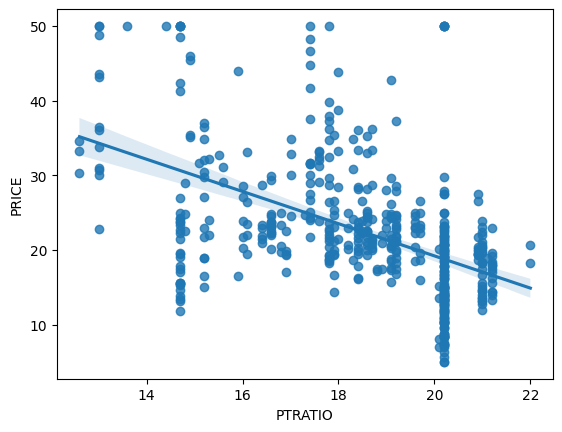

In [29]:
sns.regplot(x="PTRATIO",y="PRICE",data=dataset)

In [30]:
# ML Steps Started:-

# 1. Splitting the Independent and Dependent Features

x=dataset.drop(columns=["PRICE"]) # Except the Price Columns rest all others are the independent features so we are dropping the price columns in order to get all the independent features in the x
y=dataset['PRICE'] # Price is the only dependent feature in the entire dataset so it is stored in the y

x.columns # here it will give us the name of the columns
y.name # here y became series so you have to use the name attribute to get the name of the columns


# Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train


# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Training:-

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)

reg.get_params() # to know on which parameters the model has been trained


# prediction with the test Data:-

prediction=reg.predict(x_test)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903955


# Assumption That The Model will Work Properly or not

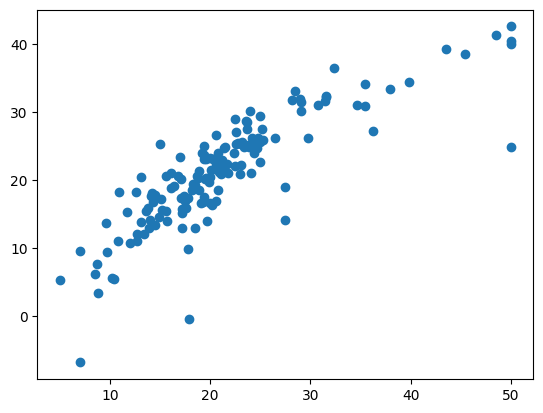

In [31]:
# Plotting a scatter plot for  the prediction

plt.scatter(y_test,prediction) # here y_test is the truth value and the prediction is the prediction that is done by us

Since the plot is linear this means that your model has perform well

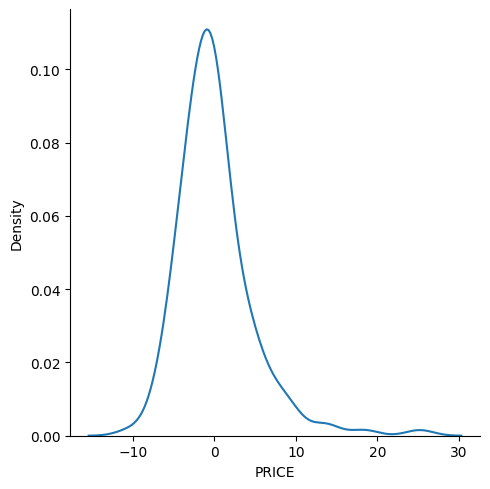

In [32]:
# Prediction using residuals(residuals means erros with repect to y_test and predicition)

residuals=y_test-prediction
residuals

# Ploting the residuals :-

sns.displot(residuals,kind="kde")

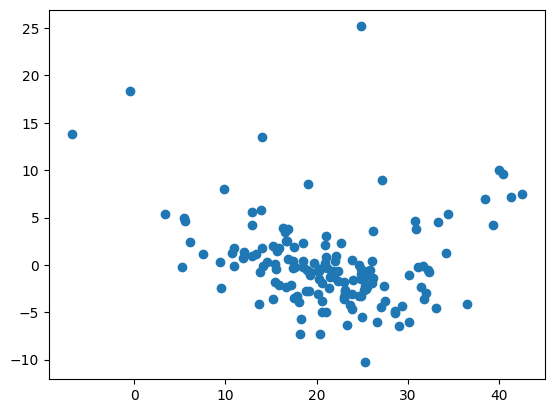

In [33]:
# Scatterplot with respect to predicition and residuals
# uniform Distribution

plt.scatter(prediction,residuals)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))

print(np.sqrt(mean_squared_error(y_test,prediction)))





## R Square and Adjusted R Square

# R^2 =1-SSR/SST
# R^2= coefficient of determination SSR= Sum of squares of residuals SST = Total Sum of the Squares

from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
print("The R Sqaure Score:",score)


# Adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]
# R2:The R2 of the model n:The Number of observations k:The Number of Predictor

print("The Adjusted R Square is :- ",1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))




3.1627098714574053
21.51744423117721
4.6386899261728205
The R Sqaure Score: 0.7112260057484932
The Adjusted R Square is :-  0.6840226584639308


**New Data Predicition**

In [70]:
first_row=boston.iloc[0]
# print(first_row.shape)    # here when you when this line will excutes you will see that there will be only one dimension but when we have given the data to model to fit we have given  two dimensional so that why we will reshape it

first_row_array = first_row.values
reshaped_row = first_row_array.reshape(1, -1)  # Reshape to (1, number_of_columns)
reshaped_row.shape  # Now here it is perfectly reshaped i.e. it is in a Two Dimensional Array (1,14)  and this how we have to give our dataset
# print(reshaped_row)   #and this how we have to give our dataset


print("Shape of reshaped_row:", reshaped_row.shape)
print("Shape of training data (X):", x_train.shape)


reshaped_row = reshaped_row[:, :-1]
scaled_reshaped_row=scaler.transform(reshaped_row)
reg.predict(scaled_reshaped_row)

Shape of reshaped_row: (1, 14)
Shape of training data (X): (354, 13)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

**Pickling The Model File for Deployement**

In [82]:
import pickle
pickle.dump(reg,open("Boston.pkl",'wb'))


# import os
# print(os.getcwd())  # Prints the current working directory

# import os
# print(os.listdir(os.getcwd()))  # Prints all files in the current directory



pickle_model=pickle.load(open("Boston.pkl","rb"))
pickle_model.predict(scaled_reshaped_row)

array([30.08649576])